In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.colors as mcolors
from sklearn.metrics import r2_score
#importing my libraries that I will be using

In [3]:
from google.colab import files
uploaded = files.upload()

gov_spend = pd.read_excel('gov_spend.xlsx')
gov_spend
#data from gov spending

Saving gov_spend.xlsx to gov_spend.xlsx


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,United States,16,16,16,16,15,15,15,14,14,...,15,15,16,17,17,16,15,15,15,14
1,"Korea, Rep.",11,11,11,11,10,10,10,10,11,...,13,13,14,15,14,14,15,15,15,15
2,Japan,13,13,14,14,15,15,15,15,16,...,18,18,18,19,19,20,20,20,20,20
3,France,21,22,22,24,23,23,24,23,23,...,23,22,23,24,24,24,24,24,24,24
4,Germany,19,19,19,19,19,19,20,19,19,...,18,18,18,20,19,19,19,19,19,19


In [4]:
from google.colab import files
uploaded = files.upload()
world_cup_gdp=pd.read_csv("worldcup_cleaned.csv")
world_cup_gdp
#gdp per capita data

Saving worldcup_cleaned.csv to worldcup_cleaned.csv


,Country,1990,1991,1992,1993,1994,1995,1996,1997,Unnamed: 9,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Brazil,"2,581","2,258","2,127","2,349","3,299","4,757","5,179","5,299",NaN,...,"5,934","7,410","8,908","8,679","11,403","13,397","12,522","12,459","12,275","8,936"
1,France,"21,586","21,501","23,615","22,239","23,360","26,792","26,758","24,169",NaN,...,"36,432","41,486","45,465","41,728","40,695","43,930","40,864","42,669","43,148","36,702"
2,Germany,"22,386","23,443","26,560","25,617","27,202","31,747","30,600","27,047",NaN,...,"36,980","42,351","46,386","42,487","42,410","47,647","44,736","47,220","48,971","41,911"
3,Japan,"25,801","29,428","31,993","36,345","39,934","44,198","39,150","35,638",NaN,...,"35,992","35,779","39,876","41,309","44,968","48,760","49,145","40,899","38,475","34,961"
4,"Korea, Rep.","6,610","7,637","8,127","8,885","10,385","12,565","13,403","12,398",NaN,...,"21,743","24,086","21,350","19,144","23,079","25,098","25,459","27,180","29,253","28,737"
5,South Africa,"3,093","3,243","3,462","3,400","3,489","3,856","3,618","3,700",NaN,...,"6,077","6,592","6,185","6,375","7,973","8,646","8,077","7,332","6,857","6,112"
6,United States,"23,889","24,342","25,419","26,387","27,695","28,691","29,968","31,459",NaN,...,"46,302","48,050","48,570","47,195","48,643","50,025","51,708","53,297","55,153","56,849"
7,Italy,"20,874","22,007","23,297","18,782","19,382","20,712","23,123","21,884",NaN,...,"33,537","37,826","40,829","37,100","35,857","38,432","34,854","35,702","36,028","30,640"


In [5]:
gov_spend = gov_spend.rename(columns={gov_spend.columns[0]: 'Country'})
world_cup_gdp = world_cup_gdp.rename(columns={world_cup_gdp.columns[0]: 'Country'})
gov_spend = gov_spend.loc[:, ~gov_spend.columns.str.contains('^Unnamed')]
world_cup_gdp = world_cup_gdp.loc[:, ~world_cup_gdp.columns.str.contains('^Unnamed')]
gov_spend_long = gov_spend.melt(id_vars=['Country'],
                                var_name='Year',
                                value_name='GovSpending')

world_cup_long = world_cup_gdp.melt(id_vars=['Country'],
                                    var_name='Year',
                                    value_name='GDP')
gov_spend_long['Year'] = gov_spend_long['Year'].astype(int)
world_cup_long['Year'] = world_cup_long['Year'].astype(int)
combined_data = pd.merge(gov_spend_long, world_cup_long, on=['Country','Year'], how='inner')

numeric_cols = ["GDP", "GovSpending"]
for col in numeric_cols:
    combined_data[col] = (
        combined_data[col]
        .astype(str)
        .str.replace(",", "", regex=False)
        .astype(float)
    )
combined_data
#this is how I combined my data and also converted strings into floats so that i could graph everything

,Country,Year,GovSpending,GDP
0,United States,1990,16.0,23889.0
1,"Korea, Rep.",1990,11.0,6610.0
2,Japan,1990,13.0,25801.0
3,France,1990,21.0,21586.0
4,Germany,1990,19.0,22386.0
...,...,...,...,...
125,United States,2015,14.0,56849.0
126,"Korea, Rep.",2015,15.0,28737.0
127,Japan,2015,20.0,34961.0
128,France,2015,24.0,36702.0


/tmp/ipython-input-1470866542.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_uwc["predicted"] = pre_umodel.predict(pre_ux)
/tmp/ipython-input-1470866542.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_uwc["predicted"] = post_umodel.predict(post_ux)
/tmp/ipython-input-1470866542.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

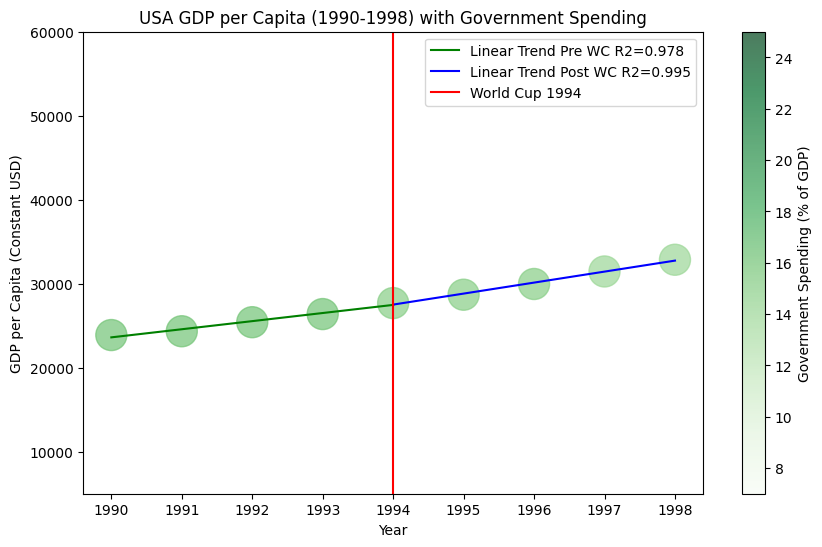

In [6]:

df_US = combined_data[
    (combined_data["Country"] == "United States") &
    (combined_data["Year"] >= 1990) &
    (combined_data["Year"] <= 1998)
].copy()
#creating dataframe of just years and country i want
pre_uwc = df_US[df_US["Year"] <=1994]
post_uwc = df_US[df_US["Year"] >= 1994]
pre_ux = pre_uwc["Year"].values.reshape(-1, 1)
pre_uy = pre_uwc["GDP"].values
pre_umodel = LinearRegression()
pre_umodel.fit(pre_ux, pre_uy)
pre_umodel = LinearRegression()
pre_umodel.fit(pre_ux, pre_uy)
pre_uwc["predicted"] = pre_umodel.predict(pre_ux)
post_ux = post_uwc["Year"].values.reshape(-1, 1)
post_uy = post_uwc["GDP"].values
post_umodel = LinearRegression()
post_umodel.fit(post_ux, post_uy)
post_umodel = LinearRegression()
post_umodel.fit(post_ux, post_uy)
post_uwc["predicted"] = post_umodel.predict(post_ux)
pre_uwc.loc[:, "predicted"] = pre_umodel.predict(pre_ux)
pre_uwc.loc[:, "residual"] = pre_uwc["GDP"] - pre_uwc["predicted"]
post_uwc.loc[:, "predicted"] = post_umodel.predict(post_ux)
post_uwc.loc[:, "residual"] = post_uwc["GDP"] - post_uwc["predicted"]
pre_r2 = r2_score(pre_uy, pre_umodel.predict(pre_ux))
post_r2 = r2_score(post_uy, post_umodel.predict(post_ux))
#calculating the r2 and the linear regression
vmin = 7
vmax = 25
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
plt.figure(figsize=(10, 6))
plt.scatter(
    df_US['Year'],
    df_US["GDP"],
    c=df_US["GovSpending"],
    cmap='Greens', norm=norm,
    s=500,
    alpha=0.7
)
#this is the government spending plotting
plt.ylim(5000, 60000)
plt.colorbar(label='Government Spending (% of GDP)')
plt.plot(pre_uwc['Year'], pre_uwc["predicted"], color='green', label=f'Linear Trend Pre WC R2={pre_r2:.3f}')
plt.plot(post_uwc['Year'], post_uwc["predicted"], color='blue', label=f'Linear Trend Post WC R2={post_r2:.3f}')
plt.axvline(1994, label="World Cup 1994",color='red')
plt.xlabel("Year")
plt.ylabel("GDP per Capita (Constant USD)")
plt.title("USA GDP per Capita (1990-1998) with Government Spending")
#this is plotting the data and everything
plt.legend()
plt.show()



#US Pre and Post WC Data

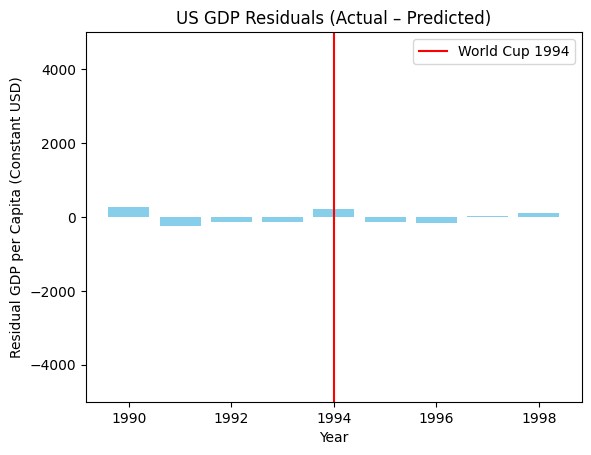

In [ ]:
plt.bar(pre_uwc['Year'], pre_uwc['residual'], color='skyblue')
plt.bar(post_uwc['Year'], post_uwc['residual'], color='skyblue')
plt.axvline(1994, color='red', label='World Cup 1994')
plt.xlabel("Year")
plt.ylabel("Residual GDP per Capita (Constant USD)")
plt.title("US GDP Residuals (Actual – Predicted)")
plt.ylim(-5000, 5000)
plt.legend()
plt.show()
#coding the residuals

/tmp/ipython-input-779096424.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_wc["predicted"] = pre_model.predict(pre_x)
/tmp/ipython-input-779096424.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_wc["predicted"] = post_model.predict(post_x)
/tmp/ipython-input-779096424.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

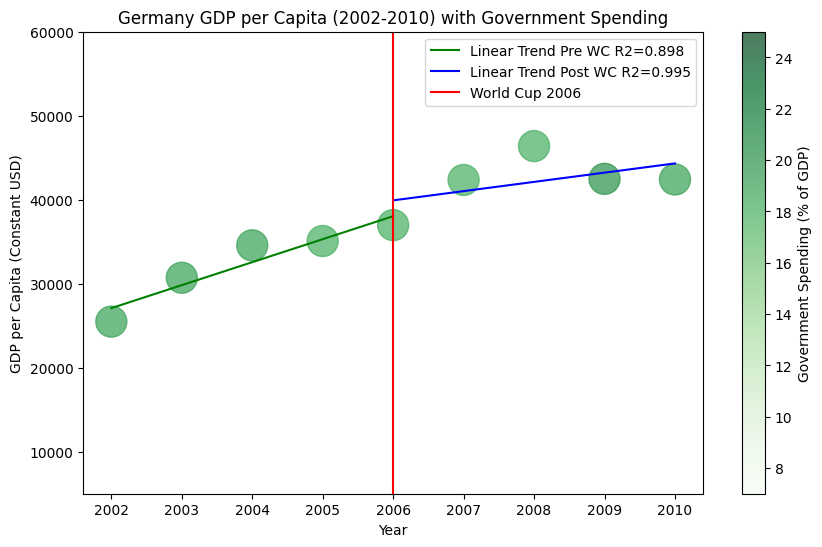

In [7]:


df_ger = combined_data[
    (combined_data["Country"] == "Germany") &
    (combined_data["Year"] >= 2002) &
    (combined_data["Year"] <= 2010)
].copy()
pre_wc = df_ger[df_ger["Year"] <=2006]
post_wc = df_ger[df_ger["Year"] >= 2006]
pre_x = pre_wc["Year"].values.reshape(-1, 1)
pre_y = pre_wc["GDP"].values
pre_model = LinearRegression()
pre_model.fit(pre_x, pre_y)
pre_model = LinearRegression()
pre_model.fit(pre_x, pre_y)
pre_wc["predicted"] = pre_model.predict(pre_x)
post_x = post_wc["Year"].values.reshape(-1, 1)
post_y = post_wc["GDP"].values
post_model = LinearRegression()
post_model.fit(post_x, post_y)
post_model = LinearRegression()
post_model.fit(post_x, post_y)
post_wc["predicted"] = post_model.predict(post_x)
pre_wc.loc[:, "predicted"] = pre_model.predict(pre_x)
pre_wc.loc[:, "residual"] = pre_wc["GDP"] - pre_wc["predicted"]
post_wc.loc[:, "predicted"] = post_model.predict(post_x)
post_wc.loc[:, "residual"] = post_wc["GDP"] - post_wc["predicted"]
pre_wc["predicted"] = pre_model.predict(pre_x)
pre_r2 = r2_score(pre_y, pre_model.predict(pre_x))
post_wc["predicted"] = post_model.predict(post_x)
vmin = 7
vmax = 25
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
plt.figure(figsize=(10, 6))
plt.scatter(
    df_ger['Year'],
    df_ger["GDP"],
    c=df_ger["GovSpending"],
    cmap='Greens', norm=norm,
    s=500,
    alpha=0.7
)
plt.ylim(5000, 60000)
plt.colorbar(label='Government Spending (% of GDP)')
plt.plot(pre_wc['Year'], pre_wc["predicted"], color='green', label=f'Linear Trend Pre WC R2={pre_r2:.3f}')
plt.plot(post_wc['Year'], post_wc["predicted"], color='blue', label=f'Linear Trend Post WC R2={post_r2:.3f}')
plt.axvline(2006, label="World Cup 2006",color='red')
plt.xlabel("Year")
plt.ylabel("GDP per Capita (Constant USD)")
plt.title("Germany GDP per Capita (2002-2010) with Government Spending")

plt.legend()
plt.show()

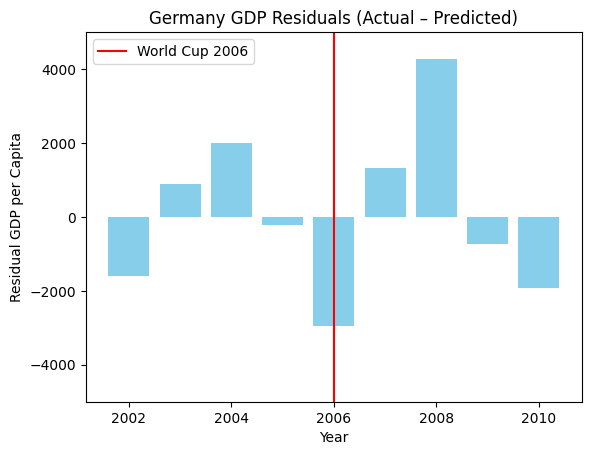

In [ ]:
plt.bar(pre_wc['Year'], pre_wc['residual'], color='skyblue')
plt.bar(post_wc['Year'], post_wc['residual'], color='skyblue')
plt.axvline(2006, color='red', label='World Cup 2006')
plt.xlabel("Year")
plt.ylabel("Residual GDP per Capita")
plt.title("Germany GDP Residuals (Actual – Predicted)")
plt.ylim(-5000, 5000)
plt.legend()
plt.show()

/tmp/ipython-input-3536088287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_fwc["predicted"] = pre_fmodel.predict(pre_x)
/tmp/ipython-input-3536088287.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_fwc["predicted"] = post_fmodel.predict(post_fx)
/tmp/ipython-input-3536088287.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

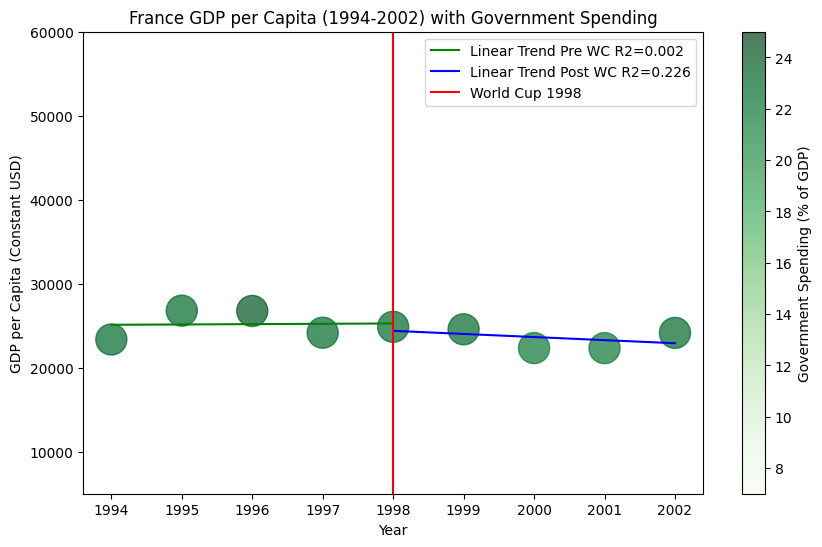

In [9]:
df_fra = combined_data[
    (combined_data["Country"] == "France") &
    (combined_data["Year"] >= 1994) &
    (combined_data["Year"] <= 2002)
].copy()
pre_fwc = df_fra[df_fra["Year"] <=1998]
post_fwc = df_fra[df_fra["Year"] >= 1998]
pre_fx = pre_fwc["Year"].values.reshape(-1, 1)
pre_fy = pre_fwc["GDP"].values
pre_fmodel = LinearRegression()
pre_fmodel.fit(pre_fx, pre_fy)
pre_fwc["predicted"] = pre_fmodel.predict(pre_x)
post_fx = post_fwc["Year"].values.reshape(-1, 1)
post_fy = post_fwc["GDP"].values
post_fmodel = LinearRegression()
post_fmodel.fit(post_fx, post_fy)
post_fwc["predicted"] = post_fmodel.predict(post_fx)
post_fwc["predicted"] = post_fmodel.predict(post_fx)
pre_fwc.loc[:, "predicted"] = pre_fmodel.predict(pre_fx)
pre_fwc.loc[:, "residual"] = pre_fwc["GDP"] - pre_fwc["predicted"]
post_fwc.loc[:, "predicted"] = post_fmodel.predict(post_fx)
post_fwc.loc[:, "residual"] = post_fwc["GDP"] - post_fwc["predicted"]
pre_fwc["predicted"] = pre_fmodel.predict(pre_fx)
pre_r2 = r2_score(pre_fy, pre_fmodel.predict(pre_fx))
post_fwc["predicted"] = post_fmodel.predict(post_fx)
post_r2 = r2_score(post_fy, post_fmodel.predict(post_fx))
vmin = 7
vmax = 25
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
plt.figure(figsize=(10, 6))
plt.scatter(
    df_fra['Year'],
    df_fra["GDP"],
    c=df_fra["GovSpending"],
    cmap='Greens', norm=norm,
    s=500,
    alpha=0.7
)
plt.ylim(5000, 60000)
plt.colorbar(label='Government Spending (% of GDP)')
plt.plot(pre_fwc['Year'], pre_fwc['predicted'], color='green', label=f'Linear Trend Pre WC R2={pre_r2:.3f}')
plt.plot(post_fwc['Year'], post_fwc['predicted'], color='blue', label=f'Linear Trend Post WC R2={post_r2:.3f}')
plt.axvline(1998, label="World Cup 1998",color='red')
plt.xlabel("Year")
plt.ylabel("GDP per Capita (Constant USD)")
plt.title("France GDP per Capita (1994-2002) with Government Spending")
plt.legend()
plt.show()

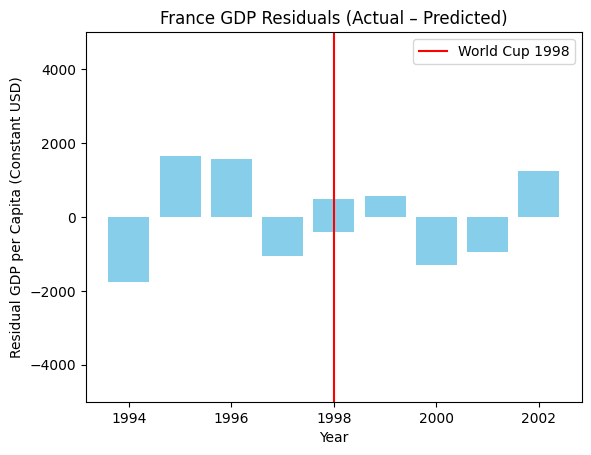

In [ ]:
plt.bar(pre_fwc['Year'], pre_fwc['residual'], color='skyblue')
plt.bar(post_fwc['Year'], post_fwc['residual'], color='skyblue')
plt.axvline(1998, color='red', label='World Cup 1998')
plt.xlabel("Year")
plt.ylabel("Residual GDP per Capita (Constant USD)")
plt.title("France GDP Residuals (Actual – Predicted)")
plt.ylim(-5000, 5000)
plt.legend()
plt.show()

/tmp/ipython-input-3596352320.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_swc["predicted"] = pre_smodel.predict(pre_sx)
/tmp/ipython-input-3596352320.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_swc["predicted"] = post_smodel.predict(post_sx)
/tmp/ipython-input-3596352320.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

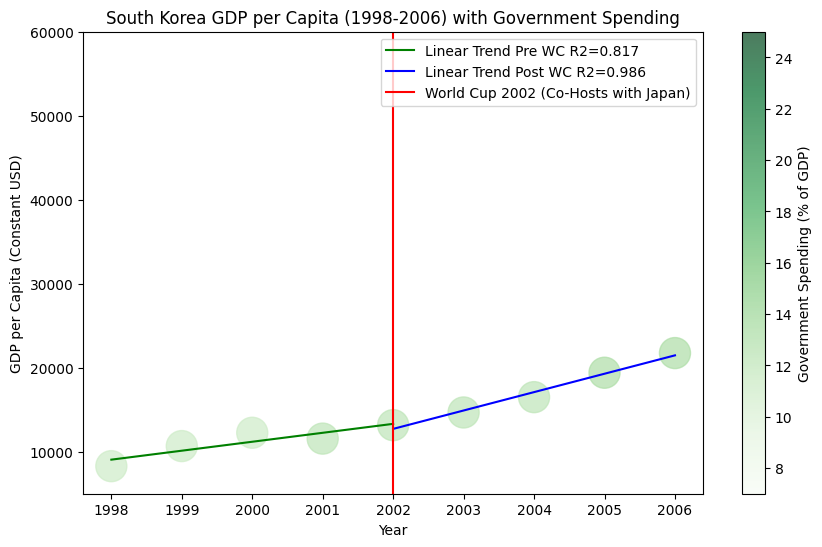

In [10]:
df_kor = combined_data[
    (combined_data["Country"] == "Korea, Rep.") &
    (combined_data["Year"] >= 1998) &
    (combined_data["Year"] <= 2006)
].copy()
pre_swc = df_kor[df_kor["Year"] <=2002]
post_swc = df_kor[df_kor["Year"] >= 2002]
pre_sx = pre_swc["Year"].values.reshape(-1, 1)
pre_sy = pre_swc["GDP"].values
pre_smodel = LinearRegression()
pre_smodel.fit(pre_sx, pre_sy)
pre_swc["predicted"] = pre_smodel.predict(pre_sx)
post_sx = post_swc["Year"].values.reshape(-1, 1)
post_sy = post_swc["GDP"].values
post_smodel = LinearRegression()
post_smodel.fit(post_sx, post_sy)
post_swc["predicted"] = post_smodel.predict(post_sx)
post_swc["predicted"] = post_smodel.predict(post_sx)
pre_swc.loc[:, "predicted"] = pre_smodel.predict(pre_sx)
pre_swc.loc[:, "residual"] = pre_swc["GDP"] - pre_swc["predicted"]
post_swc.loc[:, "predicted"] = post_smodel.predict(post_sx)
post_swc.loc[:, "residual"] = post_swc["GDP"] - post_swc["predicted"]
pre_swc["predicted"] = pre_smodel.predict(pre_sx)
pre_r2 = r2_score(pre_sy, pre_smodel.predict(pre_sx))
post_swc["predicted"] = post_smodel.predict(post_sx)
post_r2 = r2_score(post_sy, post_smodel.predict(post_sx))
vmin = 7
vmax = 25
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
plt.figure(figsize=(10, 6))
plt.scatter(
    df_kor['Year'],
    df_kor["GDP"],
    c=df_kor["GovSpending"],
    cmap='Greens', norm=norm,
    s=500,
    alpha=0.7
)
plt.ylim(5000, 60000)
plt.colorbar(label='Government Spending (% of GDP)')
plt.plot(pre_swc['Year'], pre_swc["predicted"], color='green', label=f'Linear Trend Pre WC R2={pre_r2:.3f}')
plt.plot(post_swc['Year'], post_swc["predicted"], color='blue', label=f'Linear Trend Post WC R2={post_r2:.3f}')
plt.axvline(2002, label="World Cup 2002 (Co-Hosts with Japan)",color='red')
plt.xlabel("Year")
plt.ylabel("GDP per Capita (Constant USD)")
plt.title("South Korea GDP per Capita (1998-2006) with Government Spending")
plt.legend()
plt.show()

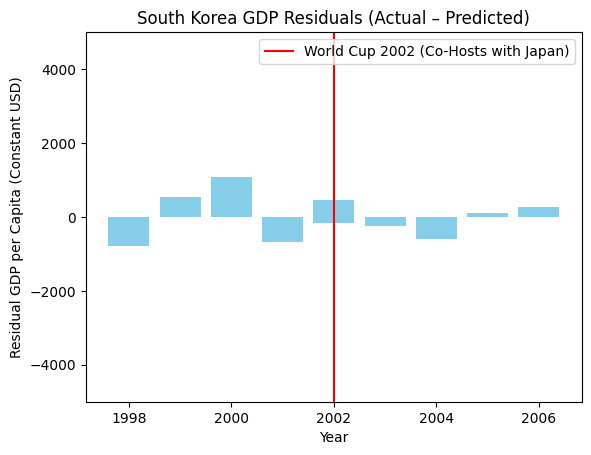

In [11]:
plt.bar(pre_swc['Year'], pre_swc['residual'], color='skyblue')
plt.bar(post_swc['Year'], post_swc['residual'], color='skyblue')
plt.axvline(2002, color='red', label='World Cup 2002 (Co-Hosts with Japan)')
plt.xlabel("Year")
plt.ylabel("Residual GDP per Capita (Constant USD)")
plt.title("South Korea GDP Residuals (Actual – Predicted)")
plt.ylim(-5000, 5000)
plt.legend()
plt.show()

/tmp/ipython-input-1754183355.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_jwc["predicted"] = pre_jmodel.predict(pre_jx)
/tmp/ipython-input-1754183355.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_jwc["predicted"] = post_jmodel.predict(post_x)
/tmp/ipython-input-1754183355.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

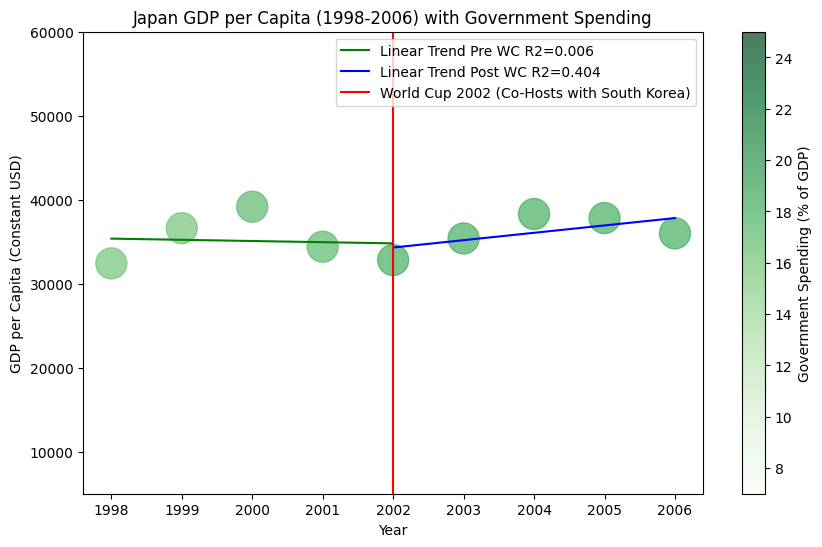

In [12]:
df_jpn = combined_data[
    (combined_data["Country"] == "Japan") &
    (combined_data["Year"] >= 1998) &
    (combined_data["Year"] <= 2006)
].copy()
pre_jwc = df_jpn[df_jpn["Year"] <=2002]
post_jwc = df_jpn[df_jpn["Year"] >= 2002]
pre_jx = pre_jwc["Year"].values.reshape(-1, 1)
pre_jy = pre_jwc["GDP"].values
pre_jmodel = LinearRegression()
pre_jmodel.fit(pre_jx, pre_jy)
pre_jwc["predicted"] = pre_jmodel.predict(pre_jx)
post_jx = post_jwc["Year"].values.reshape(-1, 1)
post_jy = post_jwc["GDP"].values
post_jmodel = LinearRegression()
post_jmodel.fit(post_jx, post_jy)
post_jwc["predicted"] = post_jmodel.predict(post_x)
post_jwc["predicted"] = post_jmodel.predict(post_x)
pre_jwc.loc[:, "predicted"] = pre_jmodel.predict(pre_x)
pre_jwc.loc[:, "residual"] = pre_jwc["GDP"] - pre_jwc["predicted"]
post_jwc.loc[:, "predicted"] = post_jmodel.predict(post_jx)
post_jwc.loc[:, "residual"] = post_jwc["GDP"] - post_jwc["predicted"]
pre_jwc["predicted"] = pre_jmodel.predict(pre_jx)
pre_r2 = r2_score(pre_jy, pre_jmodel.predict(pre_jx))
post_jwc["predicted"] = post_jmodel.predict(post_jx)
post_r2 = r2_score(post_jy, post_jmodel.predict(post_jx))
vmin = 7
vmax = 25
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
plt.figure(figsize=(10, 6))
plt.scatter(
    df_jpn['Year'],
    df_jpn["GDP"],
    c=df_jpn["GovSpending"],
    cmap='Greens', norm=norm,
    s=500,
    alpha=0.7
)
plt.ylim(5000, 60000)
plt.colorbar(label='Government Spending (% of GDP)')
plt.plot(pre_jwc['Year'], pre_jwc["predicted"], color='green', label=f'Linear Trend Pre WC R2={pre_r2:.3f}')
plt.plot(post_jwc['Year'], post_jwc["predicted"], color='blue', label=f'Linear Trend Post WC R2={post_r2:.3f}')
plt.axvline(2002, label="World Cup 2002 (Co-Hosts with South Korea)",color='red')
plt.xlabel("Year")
plt.ylabel("GDP per Capita (Constant USD)")
plt.title("Japan GDP per Capita (1998-2006) with Government Spending")

plt.legend()
plt.show()

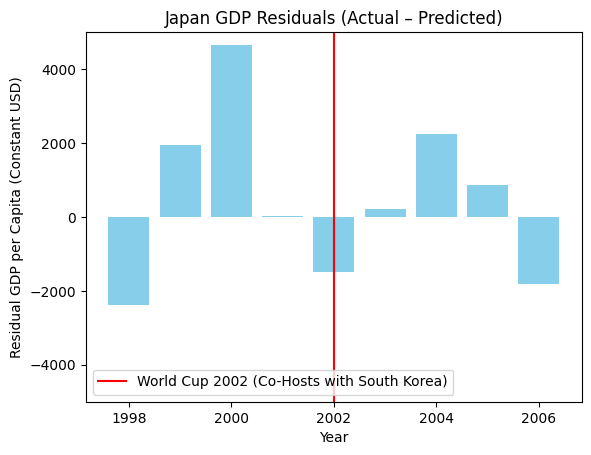

In [ ]:
plt.bar(pre_jwc['Year'], pre_jwc['residual'], color='skyblue')
plt.bar(post_jwc['Year'], post_jwc['residual'], color='skyblue')
plt.axvline(2002, color='red', label='World Cup 2002 (Co-Hosts with South Korea)')
plt.xlabel("Year")
plt.ylabel("Residual GDP per Capita (Constant USD)")
plt.title("Japan GDP Residuals (Actual – Predicted)")
plt.ylim(-5000, 5000)
plt.legend()
plt.show()

In [ ]:
df_US

,Country,Year,GovSpending,GDP
0,United States,1990,16.0,23889.0
5,United States,1991,16.0,24342.0
10,United States,1992,16.0,25419.0
15,United States,1993,16.0,26387.0
20,United States,1994,15.0,27695.0
25,United States,1995,15.0,28691.0
30,United States,1996,15.0,29968.0
35,United States,1997,14.0,31459.0
40,United States,1998,14.0,32854.0


In [ ]:
df_fra

,Country,Year,GovSpending,GDP
23,France,1994,23.0,23360.0
28,France,1995,23.0,26792.0
33,France,1996,24.0,26758.0
38,France,1997,23.0,24169.0
43,France,1998,23.0,24869.0
48,France,1999,23.0,24576.0
53,France,2000,22.0,22341.0
58,France,2001,22.0,22332.0
63,France,2002,23.0,24145.0


In [ ]:
df_ger

,Country,Year,GovSpending,GDP
64,Germany,2002,19.0,25487.0
69,Germany,2003,19.0,30711.0
74,Germany,2004,19.0,34567.0
79,Germany,2005,18.0,35084.0
84,Germany,2006,18.0,36980.0
89,Germany,2007,18.0,42351.0
94,Germany,2008,18.0,46386.0
99,Germany,2009,20.0,42487.0
104,Germany,2010,19.0,42410.0


In [ ]:
df_jpn

,Country,Year,GovSpending,GDP
42,Japan,1998,16.0,32424.0
47,Japan,1999,16.0,36610.0
52,Japan,2000,17.0,39169.0
57,Japan,2001,17.0,34406.0
62,Japan,2002,18.0,32821.0
67,Japan,2003,18.0,35387.0
72,Japan,2004,18.0,38299.0
77,Japan,2005,18.0,37813.0
82,Japan,2006,18.0,35992.0


In [ ]:
df_kor

,Country,Year,GovSpending,GDP
41,"Korea, Rep.",1998,11.0,8282.0
46,"Korea, Rep.",1999,11.0,10672.0
51,"Korea, Rep.",2000,11.0,12257.0
56,"Korea, Rep.",2001,12.0,11561.0
61,"Korea, Rep.",2002,12.0,13165.0
66,"Korea, Rep.",2003,12.0,14673.0
71,"Korea, Rep.",2004,12.0,16496.0
76,"Korea, Rep.",2005,13.0,19403.0
81,"Korea, Rep.",2006,13.0,21743.0


In [ ]:
pre_uwc

,Country,Year,GovSpending,GDP,predicted,residual
0,United States,1990,16.0,23889.0,23615.0,274.0
5,United States,1991,16.0,24342.0,24580.7,-238.7
10,United States,1992,16.0,25419.0,25546.4,-127.4
15,United States,1993,16.0,26387.0,26512.1,-125.1
20,United States,1994,15.0,27695.0,27477.8,217.2


In [ ]:
post_uwc

,Country,Year,GovSpending,GDP,predicted,residual
20,United States,1994,15.0,27695.0,27516.2,178.8
25,United States,1995,15.0,28691.0,28824.8,-133.8
30,United States,1996,15.0,29968.0,30133.4,-165.4
35,United States,1997,14.0,31459.0,31442.0,17.0
40,United States,1998,14.0,32854.0,32750.6,103.4


In [ ]:
pre_fwc

,Country,Year,GovSpending,GDP,predicted,residual
23,France,1994,23.0,23360.0,25110.6,-1750.6
28,France,1995,23.0,26792.0,25150.1,1641.9
33,France,1996,24.0,26758.0,25189.6,1568.4
38,France,1997,23.0,24169.0,25229.1,-1060.1
43,France,1998,23.0,24869.0,25268.6,-399.6


In [ ]:
post_fwc

,Country,Year,GovSpending,GDP,predicted,residual
43,France,1998,23.0,24869.0,24391.0,478.0
48,France,1999,23.0,24576.0,24021.8,554.2
53,France,2000,22.0,22341.0,23652.6,-1311.6
58,France,2001,22.0,22332.0,23283.4,-951.4
63,France,2002,23.0,24145.0,22914.2,1230.8


In [ ]:
pre_wc

,Country,Year,GovSpending,GDP,predicted,residual
64,Germany,2002,19.0,25487.0,27094.0,-1607.0
69,Germany,2003,19.0,30711.0,29829.9,881.1
74,Germany,2004,19.0,34567.0,32565.8,2001.2
79,Germany,2005,18.0,35084.0,35301.7,-217.7
84,Germany,2006,18.0,36980.0,38037.6,-1057.6


In [ ]:
post_wc

,Country,Year,GovSpending,GDP,predicted,residual
84,Germany,2006,18.0,36980.0,39923.6,-2943.6
89,Germany,2007,18.0,42351.0,41023.2,1327.8
94,Germany,2008,18.0,46386.0,42122.8,4263.2
99,Germany,2009,20.0,42487.0,43222.4,-735.4
104,Germany,2010,19.0,42410.0,44322.0,-1912.0


In [ ]:
pre_swc

,Country,Year,GovSpending,GDP,predicted,residual
41,"Korea, Rep.",1998,11.0,8282.0,9056.4,-774.4
46,"Korea, Rep.",1999,11.0,10672.0,10121.9,550.1
51,"Korea, Rep.",2000,11.0,12257.0,11187.4,1069.6
56,"Korea, Rep.",2001,12.0,11561.0,12252.9,-691.9
61,"Korea, Rep.",2002,12.0,13165.0,13318.4,-153.4


In [ ]:
post_swc

,Country,Year,GovSpending,GDP,predicted,residual
61,"Korea, Rep.",2002,12.0,13165.0,12718.8,446.2
66,"Korea, Rep.",2003,12.0,14673.0,14907.4,-234.4
71,"Korea, Rep.",2004,12.0,16496.0,17096.0,-600.0
76,"Korea, Rep.",2005,13.0,19403.0,19284.6,118.4
81,"Korea, Rep.",2006,13.0,21743.0,21473.2,269.8


In [ ]:
pre_jwc

,Country,Year,GovSpending,GDP,predicted,residual
42,Japan,1998,16.0,32424.0,34804.0,-2380.0
47,Japan,1999,16.0,36610.0,34663.0,1947.0
52,Japan,2000,17.0,39169.0,34522.0,4647.0
57,Japan,2001,17.0,34406.0,34381.0,25.0
62,Japan,2002,18.0,32821.0,34240.0,-1419.0


In [ ]:
post_jwc

,Country,Year,GovSpending,GDP,predicted,residual
62,Japan,2002,18.0,32821.0,34308.8,-1487.8
67,Japan,2003,18.0,35387.0,35185.6,201.4
72,Japan,2004,18.0,38299.0,36062.4,2236.6
77,Japan,2005,18.0,37813.0,36939.2,873.8
82,Japan,2006,18.0,35992.0,37816.0,-1824.0
